In [2]:
import tensorflow as tf
import json
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Tensorflow/sarcasm.json','r') as js:
    dataset = json.load(js)

In [5]:
dataset

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [6]:
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [7]:
def preprocessing(dataset):
    sentence = []
    labels = []
    url = []
    for item in dataset:
        sentences = item['headline'].lower()
        soup = BeautifulSoup(sentences)
        sentences = soup.get_text()
        words = sentences.split()
        filtered_sentences = ""
        for word in words:
            if word not in stopwords:
                filtered_sentences = filtered_sentences + word + ' '
        sentence.append(filtered_sentences)
        labels.append(item['is_sarcastic'])
        url.append(item['article_link'])

    return (sentence,labels,url)


In [8]:
(sentences,labels,urls) = preprocessing(dataset)

<ipython-input-7-2c89fa94dc05>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentences)


In [9]:
training_size = 23000
training_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
traning_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [30]:
vocab_size = 10000
oov = '<OOV>'
padding_type = 'post'
max_length = 10
trunc_type = 'post'
embedding_dim = 16

In [31]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token = oov)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type, padding = padding_type)

test_seq = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seq,maxlen = max_length, truncating = trunc_type, padding = padding_type)

In [32]:
training_padded = np.array(train_padded)
test_padded = np.array(test_padded)
training_labels = np.array(traning_labels)
test_labels = np.array(test_labels)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
model.fit(training_padded,training_labels,epochs = 20,validation_data = (test_padded,test_labels))

Epoch 1/20
719/719 [==============================] - 5s 6ms/step - loss: 0.5383 - accuracy: 0.7175 - val_loss: 0.4324 - val_accuracy: 0.7927
Epoch 2/20
719/719 [==============================] - 4s 6ms/step - loss: 0.3283 - accuracy: 0.8591 - val_loss: 0.4317 - val_accuracy: 0.8002
Epoch 3/20
719/719 [==============================] - 5s 8ms/step - loss: 0.2602 - accuracy: 0.8923 - val_loss: 0.4584 - val_accuracy: 0.8010
Epoch 4/20
719/719 [==============================] - 3s 5ms/step - loss: 0.2214 - accuracy: 0.9125 - val_loss: 0.5062 - val_accuracy: 0.7948
Epoch 5/20
719/719 [==============================] - 3s 4ms/step - loss: 0.1972 - accuracy: 0.9221 - val_loss: 0.5437 - val_accuracy: 0.7921
Epoch 6/20
719/719 [==============================] - 3s 4ms/step - loss: 0.1762 - accuracy: 0.9317 - val_loss: 0.6024 - val_accuracy: 0.7854
Epoch 7/20
719/719 [==============================] - 4s 6ms/step - loss: 0.1622 - accuracy: 0.9390 - val_loss: 0.6555 - val_accuracy: 0.7778
Epoch 

# Reducing Overfitting

## Start by adjusting the learning rate

Un facteur important à prendre en compte lorsque nous n-voulons lutter contre l'overfitting est de voir si notre learning_rate est n'est pas très grand car lorsque le learning_rate est grand on ne pourra pas converger vers le minimum de notre fonction du cout.
Ce que je propose ici au lieu d'utiliser les parametres par default de notre optimizer nous allons definir nous meme nos propres paramètres.

In [36]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = adam ,metrics = ['acc'])


In [38]:
history = model.fit(training_padded, training_labels, epochs=50, validation_data = (test_padded,test_labels))

Epoch 1/50
719/719 [==============================] - 4s 4ms/step - loss: 0.0580 - acc: 0.9823 - val_loss: 1.3291 - val_acc: 0.7641
Epoch 2/50
719/719 [==============================] - 3s 4ms/step - loss: 0.0537 - acc: 0.9843 - val_loss: 1.3728 - val_acc: 0.7641
Epoch 3/50
719/719 [==============================] - 3s 4ms/step - loss: 0.0507 - acc: 0.9854 - val_loss: 1.4097 - val_acc: 0.7635
Epoch 4/50
719/719 [==============================] - 4s 6ms/step - loss: 0.0485 - acc: 0.9863 - val_loss: 1.4402 - val_acc: 0.7633
Epoch 5/50
719/719 [==============================] - 3s 4ms/step - loss: 0.0469 - acc: 0.9872 - val_loss: 1.4709 - val_acc: 0.7633
Epoch 6/50
719/719 [==============================] - 3s 4ms/step - loss: 0.0454 - acc: 0.9873 - val_loss: 1.5022 - val_acc: 0.7633
Epoch 7/50
719/719 [==============================] - 3s 4ms/step - loss: 0.0442 - acc: 0.9877 - val_loss: 1.5343 - val_acc: 0.7622
Epoch 8/50
719/719 [==============================] - 4s 5ms/step - loss: 0.

In [39]:
def visualisation(history):
    #Evaluating Accuracy of the model
    %matplotlib inline
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc)) #No. of epochs

    #Plot training and validation accuracy per epoch
    import matplotlib.pyplot as plt
    plt.plot(epochs,acc,'b',label='Training Accuracy')
    plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
    plt.legend()
    plt.figure()

    #Plot training and validation loss per epoch
    plt.plot(epochs,loss,'b',label='Training Loss')
    plt.plot(epochs,val_loss,'g',label='Testing Loss')
    plt.legend()
    plt.show()


## Exploring model architecture

##  Using dropout

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation = 'relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['acc'])

In [42]:
history = model.fit(training_padded, training_labels, epochs=50, validation_data = (test_padded,test_labels))

Epoch 1/50
719/719 [==============================] - 5s 6ms/step - loss: 0.5779 - acc: 0.6978 - val_loss: 0.4490 - val_acc: 0.7981
Epoch 2/50
719/719 [==============================] - 3s 4ms/step - loss: 0.3760 - acc: 0.8391 - val_loss: 0.4201 - val_acc: 0.8083
Epoch 3/50
719/719 [==============================] - 3s 4ms/step - loss: 0.2957 - acc: 0.8821 - val_loss: 0.4462 - val_acc: 0.7956
Epoch 4/50
719/719 [==============================] - 3s 4ms/step - loss: 0.2547 - acc: 0.9042 - val_loss: 0.4761 - val_acc: 0.7997
Epoch 5/50
719/719 [==============================] - 3s 5ms/step - loss: 0.2295 - acc: 0.9169 - val_loss: 0.5077 - val_acc: 0.7948
Epoch 6/50
719/719 [==============================] - 4s 5ms/step - loss: 0.2046 - acc: 0.9264 - val_loss: 0.5550 - val_acc: 0.7916
Epoch 7/50
719/719 [==============================] - 3s 4ms/step - loss: 0.1870 - acc: 0.9365 - val_loss: 0.6019 - val_acc: 0.7878
Epoch 8/50
719/719 [==============================] - 3s 4ms/step - loss: 0.

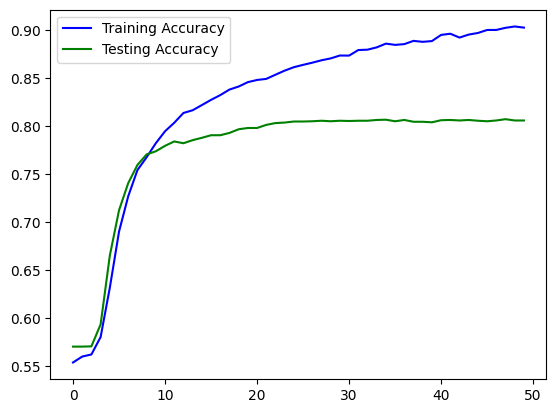

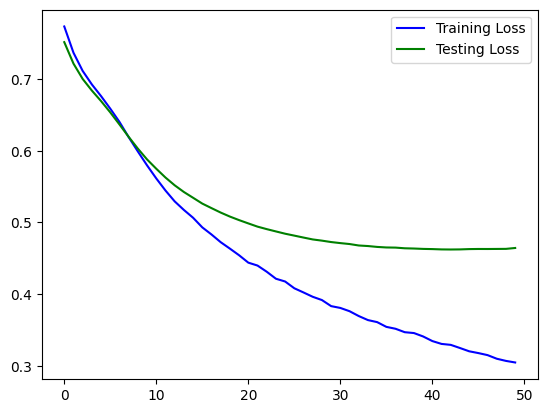

In [49]:
visualisation(history)

## Using regularization

La régularisation est une technique qui aide à prévenir le surajustement en réduisant la polarisation des poids. Si les poids de certains neurones sont trop lourds, la régularisation les punit efficacement. De manière générale, il existe deux types de régularisation : L1 et L2.

La régularisation L1 est souvent appelée régularisation au lasso (moindre rétrécissement absolu et opérateur de sélection). Cela nous aide efficacement à ignorer les poids nuls ou proches de zéro lors du calcul d'un résultat dans une couche.

La régularisation L2 est souvent appelée régression ridge car elle écarte les valeurs en prenant leurs carrés. Cela tend à amplifier les différences entre les valeurs non nulles et les valeurs nulles ou proches de zéro, créant un effet de crête.

Les deux approches peuvent également être combinées dans ce que l'on appelle parfois la régularisation élastique.

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [46]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

In [47]:
model.compile(loss = 'binary_crossentropy', optimizer = adam ,metrics = ['acc'])

In [48]:
history = model.fit(training_padded, training_labels, epochs=50, validation_data = (test_padded,test_labels))

Epoch 1/50
719/719 [==============================] - 6s 6ms/step - loss: 0.7734 - acc: 0.5534 - val_loss: 0.7516 - val_acc: 0.5700
Epoch 2/50
719/719 [==============================] - 3s 4ms/step - loss: 0.7368 - acc: 0.5596 - val_loss: 0.7217 - val_acc: 0.5700
Epoch 3/50
719/719 [==============================] - 3s 4ms/step - loss: 0.7114 - acc: 0.5618 - val_loss: 0.7002 - val_acc: 0.5702
Epoch 4/50
719/719 [==============================] - 3s 4ms/step - loss: 0.6925 - acc: 0.5800 - val_loss: 0.6840 - val_acc: 0.5932
Epoch 5/50
719/719 [==============================] - 3s 4ms/step - loss: 0.6762 - acc: 0.6314 - val_loss: 0.6693 - val_acc: 0.6649
Epoch 6/50
719/719 [==============================] - 4s 6ms/step - loss: 0.6588 - acc: 0.6898 - val_loss: 0.6536 - val_acc: 0.7121
Epoch 7/50
719/719 [==============================] - 3s 4ms/step - loss: 0.6403 - acc: 0.7267 - val_loss: 0.6367 - val_acc: 0.7404
Epoch 8/50
719/719 [==============================] - 3s 4ms/step - loss: 0.

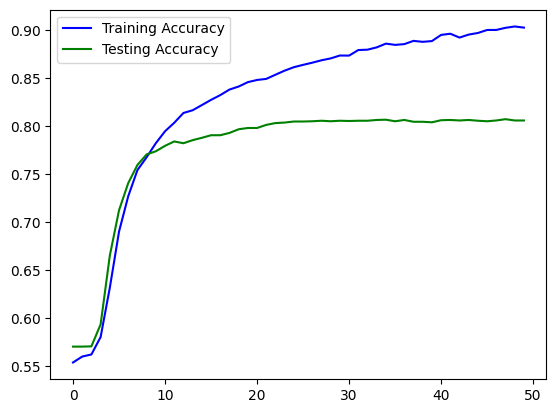

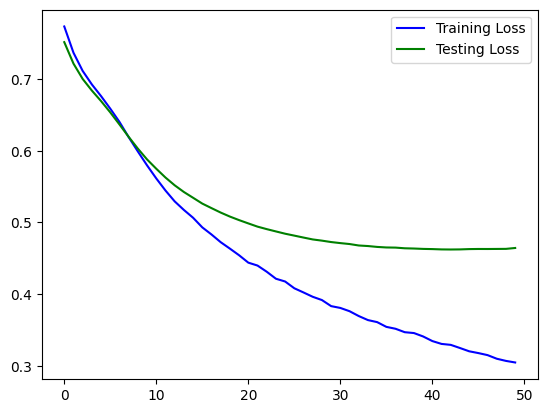

In [50]:
visualisation(history)

## Using model to classify sentence

In [71]:
sentences = ["granny starting to fear spiders in the garden might be real",
                 "CIA Realizes It's Been Using Black Highlighters All These Years."
            ]

In [72]:
sequences = tokenizer.texts_to_sequences(sentences)

In [73]:
print(sequences)

[[1, 788, 638, 842, 1, 533, 1055, 2572, 307, 3250, 116], [1252, 1028, 1, 1, 502, 46, 1, 601, 1, 52]]


In [74]:
padded = pad_sequences(sequences, maxlen=max_length,
                           padding=padding_type, truncating=trunc_type)

In [75]:
print(padded)

[[   1  788  638  842    1  533 1055 2572  307 3250]
 [1252 1028    1    1  502   46    1  601    1   52]]


In [76]:
def prediction(model,padded):
    result = model.predict(padded)
    res = []
    for value in result:
        if float(value) > 0.5:
            res.append({'sarcasm' : float(value)})
        else:
            res.append({'not sarcasm'})
    return res

In [77]:
prediction(model,padded)

1/1 [==============================] - 0s 21ms/step


[{'sarcasm': 0.7512205839157104}, {'sarcasm': 0.8516251444816589}]

## Using pretrained Embeddings from Tensorflow

In [78]:
import tensorflow_hub as hub

In [84]:
(sentences,labels,urls) = preprocessing(dataset)

<ipython-input-7-2c89fa94dc05>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentences)


In [85]:
training_size = 23000
training_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
traning_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [86]:
hub_layer = hub.KerasLayer(
        "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1",
        output_shape=[20], input_shape=[],
         dtype=tf.string, trainable=False
    )

In [87]:
model = tf.keras.Sequential([
        hub_layer,
        tf.keras.layers.Dense(16,activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9,
                                    beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy',optimizer=adam,
                  metrics=['acc'])

In [88]:
history = model.fit(training_sentences, traning_labels, epochs=50, validation_data = (test_sentences,test_labels))

Epoch 1/50
719/719 [==============================] - 3s 3ms/step - loss: 0.9621 - acc: 0.5127 - val_loss: 0.8615 - val_acc: 0.5400
Epoch 2/50
719/719 [==============================] - 2s 2ms/step - loss: 0.8664 - acc: 0.5382 - val_loss: 0.8028 - val_acc: 0.5756
Epoch 3/50
719/719 [==============================] - 2s 2ms/step - loss: 0.8122 - acc: 0.5650 - val_loss: 0.7664 - val_acc: 0.5985
Epoch 4/50
719/719 [==============================] - 2s 2ms/step - loss: 0.7736 - acc: 0.5795 - val_loss: 0.7408 - val_acc: 0.6139
Epoch 5/50
719/719 [==============================] - 2s 2ms/step - loss: 0.7449 - acc: 0.5983 - val_loss: 0.7217 - val_acc: 0.6295
Epoch 6/50
719/719 [==============================] - 2s 3ms/step - loss: 0.7263 - acc: 0.6067 - val_loss: 0.7071 - val_acc: 0.6336
Epoch 7/50
719/719 [==============================] - 3s 4ms/step - loss: 0.7126 - acc: 0.6117 - val_loss: 0.6961 - val_acc: 0.6368
Epoch 8/50
719/719 [==============================] - 2s 2ms/step - loss: 0.

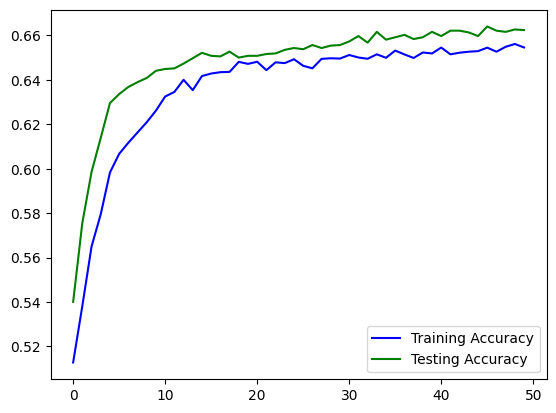

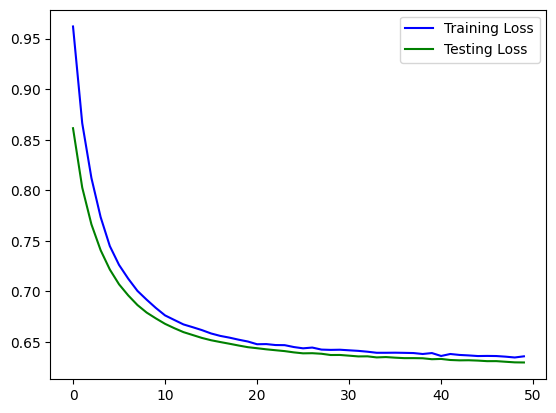

In [89]:
visualisation(history)